In [14]:
# Initial imports
import os                                               #os interface library 
import pandas as pd                                     #panda library
from dotenv import load_dotenv                          #dotenv library to read keys and secrect key for api
import alpaca_trade_api as trade_api                     #Alpaca library
from datetime import date                               #Data-Time library
import matplotlib.pyplot as plt

#set the backend of matplotlib to the 'inline' backend 
#%matplotlib inline 

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key=os.getenv("ALPACA_API_KEY")
alpaca_secret_key=os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = trade_api.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [4]:
# Format current date as ISO format
today = date.today() + pd.DateOffset(years=-5)                        #Get current date and move to 5 years back
today = pd.Timestamp(today, tz="America/New_York").isoformat()        #Convert to datetime format

# Set the tickers
tickes=['APD', 'APH', 'RACE', 'TEL', 'IFF', 'GLW', 'SPY']

# Set timeframe to '1D' for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
portfolio = alpaca.get_bars(tickes, timeframe, start=today,  adjustment='raw').df

# Clean the data


In [5]:
#Extract ticker info object & Return dataframe
def get_ticker_info(data, symbol):
    ticker_info = pd.DataFrame(data[data["symbol"]==symbol].drop("symbol", axis=1))
    return ticker_info
    

In [6]:
#Extract close price for all tickers
all_data = pd.DataFrame()
for tick in tickes:
    h  = f"{tick} Close"
    tt = pd.DataFrame(get_ticker_info(portfolio, tick)['close'])
    all_data[h] = tt
    
all_data

,APD Close,APH Close,RACE Close,TEL Close,IFF Close,GLW Close,SPY Close
timestamp,,,,,,,
2017-04-13 04:00:00+00:00,134.30,68.65,70.63,71.93,131.94,26.32,232.51
2017-04-17 04:00:00+00:00,135.86,69.53,71.32,72.77,133.02,26.54,234.57
2017-04-18 04:00:00+00:00,135.27,69.96,70.59,73.08,134.07,26.89,233.87
2017-04-19 04:00:00+00:00,134.96,70.12,71.26,73.18,134.53,26.86,233.44
2017-04-20 04:00:00+00:00,136.90,70.82,71.40,74.12,135.80,27.11,235.34
...,...,...,...,...,...,...,...
2022-04-07 04:00:00+00:00,251.37,73.97,221.40,125.40,125.90,34.41,448.77
2022-04-08 04:00:00+00:00,251.20,73.28,219.51,124.76,124.27,34.09,447.57
2022-04-11 04:00:00+00:00,249.83,71.74,220.76,123.22,125.67,33.67,439.92


Text(0.5, 1.0, 'Tickers vs. S&P 500')

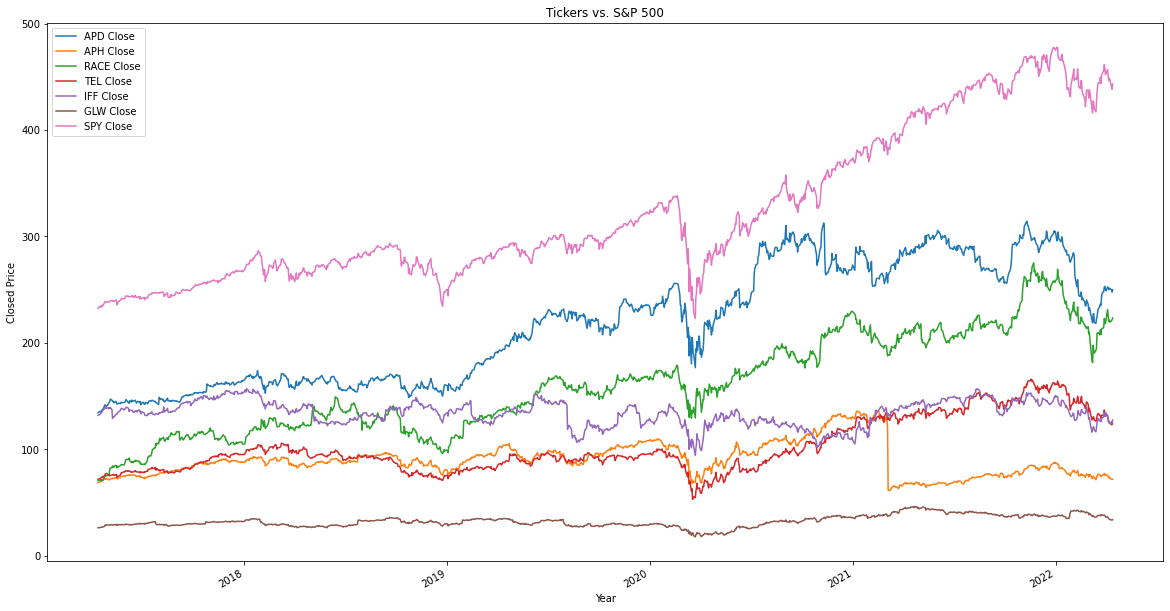

In [13]:
plot = all_data.plot(kind='line', figsize = (20,11))
plt.xlabel('Year')
plt.ylabel('Closed Price')
plt.title('Tickers vs. S&P 500')